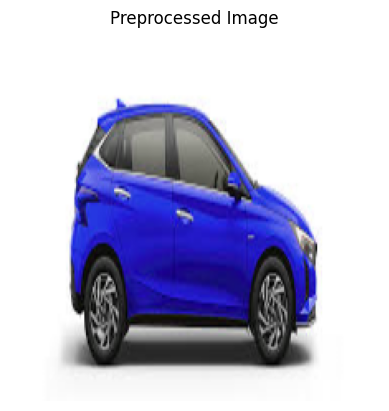

In [5]:
#Readers would appreciate a visual confirmation that the image is correctly resized and transformed.
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess image
image = cv2.imread("/content/TheCar.jpg")
image = cv2.resize(image, (224, 224))  # Resize to match input shape
image = np.transpose(image, (2, 0, 1))  # Convert from HWC to CHW format

# Convert to PyTorch tensor
tensor_image = torch.tensor(image).float().unsqueeze(0)

# Display image after preprocessing
plt.imshow(np.transpose(image, (1, 2, 0)))  # Convert back to HWC for visualization
plt.title("Preprocessed Image")
plt.axis("off")
plt.show()


In [6]:
#For readers who want numerical confirmation, print the tensor shape:
print("Tensor shape:", tensor_image.shape)


Tensor shape: torch.Size([1, 3, 224, 224])


The output conveys
1 → Batch size
3 → Color channels (RGB)
224 x 224 → Image dimensions


**For deep learning practitioners, it's useful to see actual numerical values:**

In [7]:
print("Sample pixel values:\n", tensor_image[:, :, 100, 100])  # Random pixel


Sample pixel values:
 tensor([[ 33.,  10., 171.]])


In [13]:
import torch
import torch.nn as nn
import numpy as np

# Define a simple Linear Model
model = nn.Linear(128, 64)

# Compile the model with a backend
try:
    model = torch.compile(model, backend="inductor")  # Use "inductor" as an available backend
    print("Model successfully compiled using 'inductor' backend.")
except Exception as e:
    print(f"Compilation failed: {e}")

# Create a random input tensor
input_tensor = torch.randn(32, 128)  # Batch of 32, input size 128

# Perform forward pass
output = model(input_tensor)

# Print the shape of input and output
print("Input Tensor Shape:", input_tensor.shape)
print("Output Tensor Shape:", output.shape)

# Display a sample of the output values
print("Sample Output Values (First Row):", output[0].detach().numpy())


Model successfully compiled using 'inductor' backend.
Input Tensor Shape: torch.Size([32, 128])
Output Tensor Shape: torch.Size([32, 64])
Sample Output Values (First Row): [-1.0095952e+00  1.0711439e-01 -8.1045055e-01 -1.0489506e+00
 -9.4924346e-03 -1.4830991e+00  1.2586066e+00  5.6193250e-01
  5.3322363e-01 -3.0632386e-01 -1.5551215e-01 -7.9545610e-02
 -8.5491019e-01  2.2905675e-01  5.6956160e-01 -3.1845310e-01
  6.5486431e-01 -9.1694482e-04  9.6824244e-03  6.6685694e-01
  3.9050180e-01 -3.7260315e-01 -8.6487174e-02 -3.9386712e-03
  7.7902012e-02  2.2087824e-01 -5.3913361e-01  1.4153539e+00
 -3.0662727e-01  2.5042903e-01 -3.6756089e-01 -3.8580820e-01
  2.0405108e-01 -6.0239917e-01  9.8709607e-01 -1.5799785e-01
 -6.0620135e-01  3.1898510e-01  6.9288397e-01  2.0679581e-01
  7.5490409e-01  5.0724721e-01 -2.7864006e-01 -4.1480321e-01
 -5.1719797e-01 -3.3375221e-01  2.6154006e-01 -1.8194339e-01
  7.4953568e-01  3.3272454e-01  6.1174834e-01 -7.8975058e-01
  3.7103677e-01  6.2847227e-01 -2.7

Shape of SHAP values (positive class): (100, 4, 2)
Shape of feature matrix (X): (100, 4)


TypeError: only integer scalar arrays can be converted to a scalar index

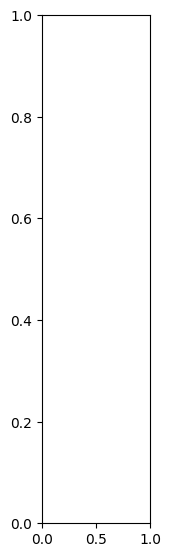

In [22]:
# Step 1: Import required libraries
import shap
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Step 2: Create a synthetic binary classification dataset
X, y = make_classification(
    n_samples=100,
    n_features=4,
    n_informative=3,
    n_redundant=0,
    random_state=42
)
feature_names = ["Feature 1", "Feature 2", "Feature 3", "Feature 4"]

# Step 3: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Step 4: Use SHAP to explain predictions
explainer = shap.TreeExplainer(model)  # Create SHAP explainer
shap_values = explainer.shap_values(X)  # Compute SHAP values

# Step 5: Correctly handle SHAP values for binary classification
# Check if SHAP values is a list (for multi-class or binary classification)
if isinstance(shap_values, list):
    # Use SHAP values for the positive class
    shap_values_for_plot = shap_values[1]
else:
    shap_values_for_plot = shap_values  # Use directly if not a list

# Step 6: Debugging Shapes (Optional)
print("Shape of SHAP values (positive class):", np.array(shap_values_for_plot).shape)
print("Shape of feature matrix (X):", X.shape)

# Step 7: Fix potential indexing issues for feature names
# Ensure feature names align with SHAP values and input matrix
assert shap_values_for_plot.shape[1] == len(feature_names), "SHAP values and feature names do not align!"
assert shap_values_for_plot.shape[0] == X.shape[0], "SHAP values and input matrix do not align!"

# Step 8: Visualize the explanation
shap.summary_plot(shap_values_for_plot, X, feature_names=feature_names)
